Task 4: Model Interpretation ● Write Python code to: ○ Show the correlation matrix using a heatmap. ○ Identify which features have the strongest relationship with the target. ○ Discuss multicollinearity and how it might affect regression.

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt


In [2]:
data=fetch_california_housing()
df=pd.DataFrame(data.data,columns=data.feature_names)
df['MedHouseVal']=data.target

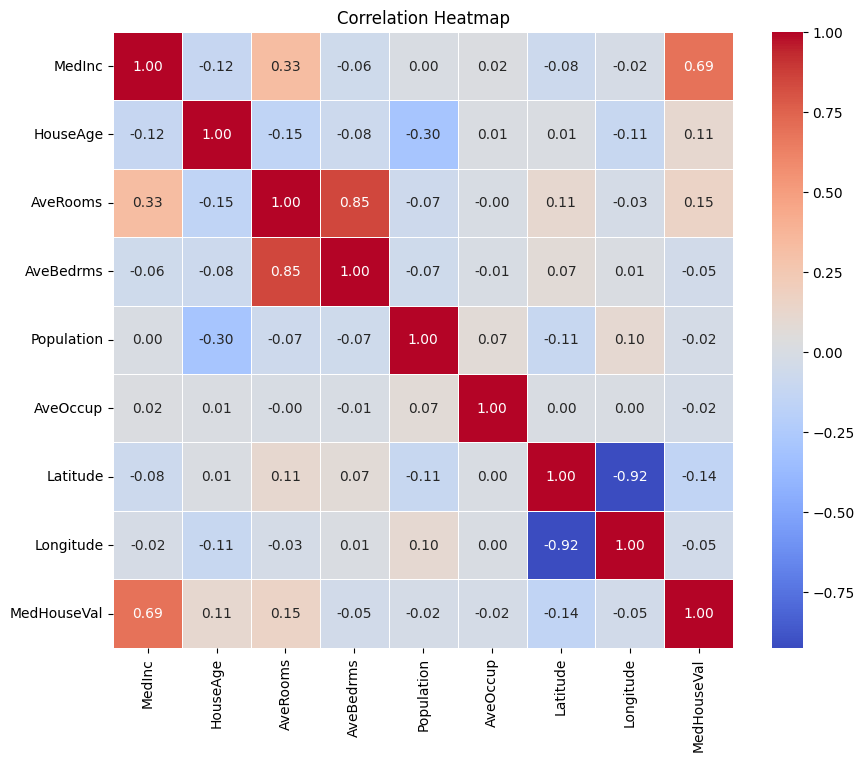

In [3]:
matrix=df.corr()

plt.figure(figsize=(10,8))

sns.heatmap(matrix, annot=True, cmap='coolwarm',fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [4]:
# Correlation of each feature with the target
target_corr = matrix["MedHouseVal"]
target_corr

MedInc         0.688075
HouseAge       0.105623
AveRooms       0.151948
AveBedrms     -0.046701
Population    -0.024650
AveOccup      -0.023737
Latitude      -0.144160
Longitude     -0.045967
MedHouseVal    1.000000
Name: MedHouseVal, dtype: float64

In [5]:
print("📌 Feature Correlation with Target:\n")
print(target_corr.sort_values(ascending=False))

📌 Feature Correlation with Target:

MedHouseVal    1.000000
MedInc         0.688075
AveRooms       0.151948
HouseAge       0.105623
AveOccup      -0.023737
Population    -0.024650
Longitude     -0.045967
AveBedrms     -0.046701
Latitude      -0.144160
Name: MedHouseVal, dtype: float64


In [6]:
print(f"Correlation between AveRooms and AveBedrms: {df['AveRooms'].corr(df['AveBedrms']):.4f}")

Correlation between AveRooms and AveBedrms: 0.8476


🧠 Step 5: Multicollinearity — What & Why It Matters 📌 What is Multicollinearity? Multicollinearity happens when two or more independent variables are highly correlated with each other.

✅ Example from this dataset:

AveRooms and AveBedrms are likely highly correlated (since more rooms usually means more bedrooms).

⚠️ Why it's a problem in regression? It makes the model unstable — small changes in data can cause large swings in coefficients.

Makes it hard to interpret the importance of individual features.

Can inflate standard errors and reduce the reliability of predictions.

✅ Ways to handle multicollinearity: Method Description Drop one of the correlated features If two features are redundant Use Regularization models Like Ridge or Lasso Regression Use PCA (dimensionality reduction) For advanced cases